In [219]:
#Principal components Analysis
#t-distributed Stochastic Neighbour Embedding

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df=pd.read_excel('digits.xlsx')

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1797 non-null   int64
 1   1       1797 non-null   int64
 2   2       1797 non-null   int64
 3   3       1797 non-null   int64
 4   4       1797 non-null   int64
 5   5       1797 non-null   int64
 6   6       1797 non-null   int64
 7   7       1797 non-null   int64
 8   8       1797 non-null   int64
 9   9       1797 non-null   int64
 10  10      1797 non-null   int64
 11  11      1797 non-null   int64
 12  12      1797 non-null   int64
 13  13      1797 non-null   int64
 14  14      1797 non-null   int64
 15  15      1797 non-null   int64
 16  16      1797 non-null   int64
 17  17      1797 non-null   int64
 18  18      1797 non-null   int64
 19  19      1797 non-null   int64
 20  20      1797 non-null   int64
 21  21      1797 non-null   int64
 22  22      1797 non-null   int64
 23  23      1797 

In [225]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2


In [226]:
df.iloc[0]

0          0
1          0
2          5
3         13
4          9
          ..
60        10
61         0
62         0
63         0
number     0
Name: 0, Length: 65, dtype: int64

In [227]:
df.drop('number',axis=1).iloc[0]

0      0
1      0
2      5
3     13
4      9
      ..
59    13
60    10
61     0
62     0
63     0
Name: 0, Length: 64, dtype: int64

In [233]:
#here 64 rows so we create here 8*8 matrics
im=np.array(df.drop('number',axis=1).iloc[0]).reshape(8,8)

0


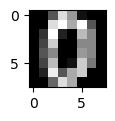

1


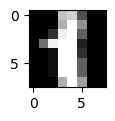

2


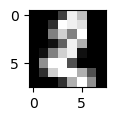

3


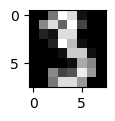

4


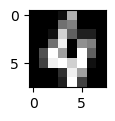

5


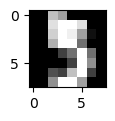

6


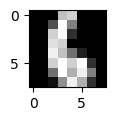

7


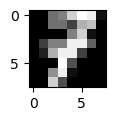

8


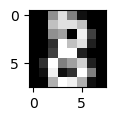

9


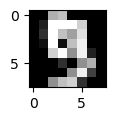

0


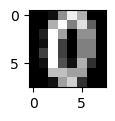

1


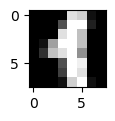

2


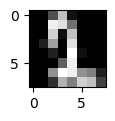

3


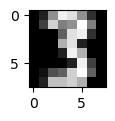

4


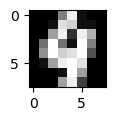

In [235]:
#Visualizing data
#create multiple images here
for i in range(15):
    print(df['number'][i])
    plt.figure(figsize=(1,1))
    im=np.array(df.drop('number',axis=1).iloc[i]).reshape(8,8)
    plt.imshow(im,cmap='gray')
    plt.show()

<Axes: xlabel='number'>

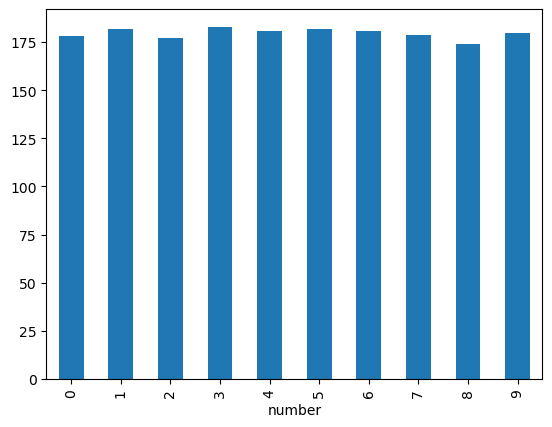

In [237]:
df['number'].value_counts().sort_index().plot(kind='bar')

In [240]:
#pre-processing data
X=df.drop('number',axis=1)
y=df['number']

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

#Creting t-SNE plot
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X)

In [241]:
X_tsne=pd.DataFrame(X_tsne,columns=['col1','col2'])

In [242]:
X_tsne

,col1,col2
0,-38.962852,-31.023830
1,-15.371493,-2.898132
2,5.914712,-14.592107
3,28.040783,2.867509
4,-36.505737,2.648257
...,...,...
1792,36.854179,18.308922
1793,-31.393980,-25.563408
1794,2.064077,-5.033070
1795,36.507042,16.138769


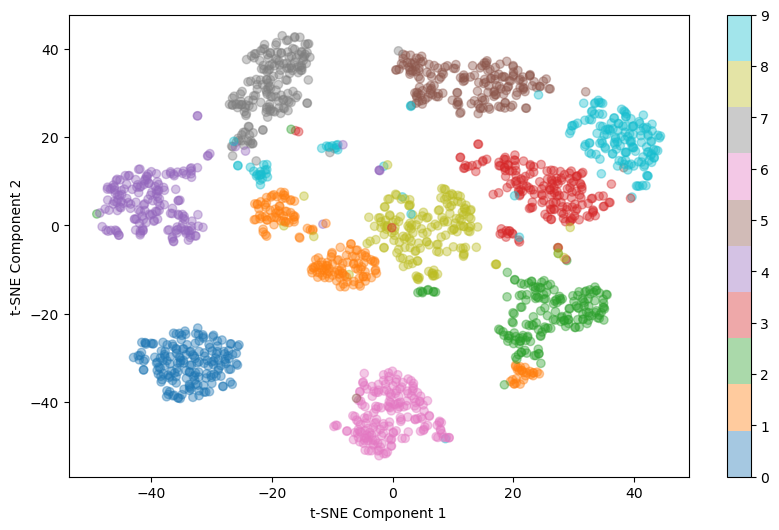

In [243]:
plt.figure(figsize=(10,6))
scatter=plt.scatter(X_tsne['col1'],X_tsne['col2'],c=y,cmap='tab10',alpha=0.4)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter,ticks=range(10))
plt.show()

In [244]:
#Without PCA(Creting model with all columns)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1000)

In [245]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.98        41
           2       0.97      1.00      0.99        33
           3       0.97      0.91      0.94        32
           4       1.00      0.97      0.99        36
           5       0.95      0.97      0.96        37
           6       1.00      0.97      0.99        34
           7       0.97      1.00      0.99        33
           8       0.97      0.97      0.97        38
           9       0.95      0.93      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [246]:
#With PCA
from sklearn.decomposition import PCA

In [247]:
pca=PCA()

In [248]:
X_pca=pca.fit_transform(X)

In [249]:
X_pca.shape #Eighen vectors

(1797, 64)

In [250]:
X.shape #Original scale data

(1797, 64)

In [251]:
var=pca.explained_variance_ratio_
pca_df=pd.DataFrame(range(1,65),columns=['Principal Components'])
pca_df['Explained Variance']=var

In [252]:
pca_df['Cummulative sum of variance']=np.cumsum(pca_df['Explained Variance'])*100

In [253]:
pca_df[pca_df['Cummulative sum of variance']>95]

,Principal Components,Explained Variance,Cummulative sum of variance
39,40,0.004232,95.077911
40,41,0.004061,95.483964
41,42,0.003971,95.881049
42,43,0.003565,96.237542
43,44,0.003408,96.578330
44,45,0.003278,96.906165
45,46,0.003110,97.217197
46,47,0.002886,97.505772
47,48,0.002765,97.782262
48,49,0.002592,98.041436


In [255]:
pca=PCA(n_components=24) #n_components=39 bcoz from>95 is starting from 40 components
X_pca=pca.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=1000)
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.98        41
           2       0.97      1.00      0.99        33
           3       0.97      0.91      0.94        32
           4       1.00      0.97      0.99        36
           5       0.95      0.97      0.96        37
           6       1.00      0.97      0.99        34
           7       0.97      1.00      0.99        33
           8       0.97      0.97      0.97        38
           9       0.95      0.93      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

